# 全球陆地掩膜

In [1]:
import geopandas as gpd

globe_path = "H:\\Region\\世界国家\\世界国家.shp"
globe_shp = gpd.read_file(globe_path)
globe_shp

,OBJECTID,NAME,FENAME,FCNAME,SOC,POP,ELEMID,SHAPE_LENG,SHAPE_AREA,ID1,geometry
0,1,None,None,None,None,0.0,0,154.008856,27.507542,1,"MULTIPOLYGON (((-88.72527 48.37894, -88.72784 ..."
1,2,GREENLAND,Greenland,¸ñÁêÀ¼,GRL,6.0,1,1359.592591,662.855357,2,"MULTIPOLYGON (((-50.22860 62.88935, -50.24817 ..."
2,3,CANADA,Canada,¼ÓÄÃ´ó,CAN,3166.0,2,3635.736641,1692.808594,3,"MULTIPOLYGON (((-84.91705 78.34447, -84.92731 ..."
3,4,UNITED STATES,United States Of America,ÃÀ¹ú,USA,28837.0,3,1261.087368,1100.995648,4,"MULTIPOLYGON (((-150.00000 61.23876, -150.0042..."
4,5,SAINT PIERRE AND MIQUELON,Saint Pierre and Miquelon,Ê¥Æ¤°£¶ûºÍÃÜ¿ËÂ¡,SPM,1.0,4,1.725672,0.026938,5,"MULTIPOLYGON (((-56.34514 46.93098, -56.34517 ..."
...,...,...,...,...,...,...,...,...,...,...,...
242,243,TURKEY,Republic of Turkey,ÍÁ¶úÆä,TUR,7071.0,242,97.734093,81.320764,243,"MULTIPOLYGON (((26.96211 42.00383, 26.96269 42..."
243,244,"KOREA,DEMOCRATIC PEOPLE'S REPUBLIC OF",Democratic People,³¯ÏÊ,PRK,2222.0,243,45.424564,12.924878,244,"MULTIPOLYGON (((124.39977 39.83885, 124.39829 ..."
244,245,None,None,Ñ¼ÂÌ½­,None,0.0,244,6.225348,0.038358,245,"MULTIPOLYGON (((124.32082 39.90081, 124.32303 ..."
245,246,VIET NAM,Socialist Republic of Viet Nam,Ô½ÄÏ,VNM,8067.0,245,96.949472,27.834547,246,"MULTIPOLYGON (((106.55365 16.98305, 106.55341 ..."


In [2]:
import numpy as np
from shapely.geometry import box

globe_grid = np.full((180, 360), False)

for lat in range(0, 181):
    for lon in range(0, 361):
        bbox_polygon = box(lon - 180., lat - 90., lon - 179., lat - 89.)
        bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_polygon], crs=globe_shp.crs)
        clipped_gdf = gpd.clip(globe_shp, bbox_gdf)
        clipped_gdf['area'] = clipped_gdf.geometry.area

        if clipped_gdf['area'].sum() > 0.4:
            globe_grid[lat, lon] = 1.0

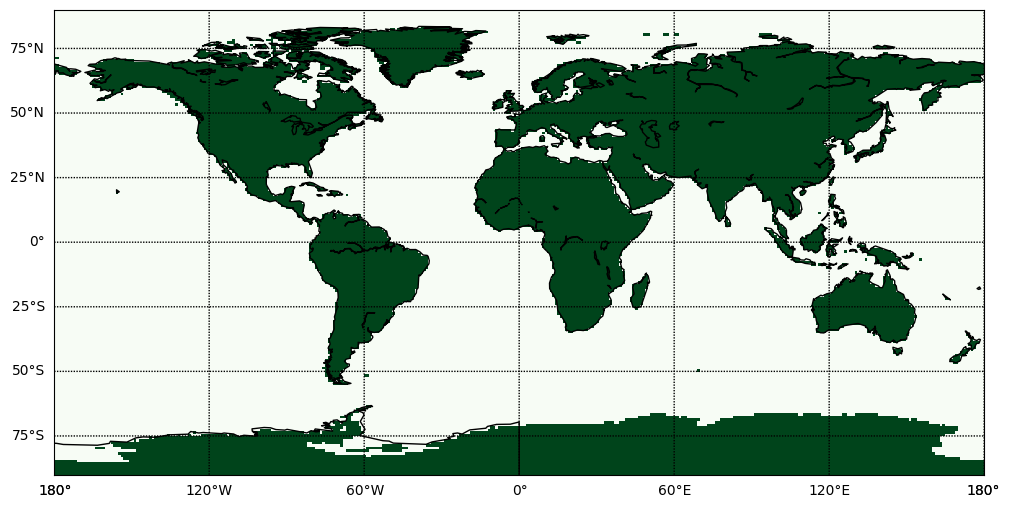

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap()
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, globe_grid, cmap='Greens')
# cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [6]:
np.save("globe.npy", globe_grid)